In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = sym.symbols('x')
x0, x1, x2, x3, x4 = 0, 5, 7, 9, 13
C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14 = sym.symbols('C_1 C_2 C_3 C_4 C_5 C_6 C_7 C_8 C_9 C_10 C_11 C_12 C_13 C_14')
q = 8
F = 25
EI = 1500
k = 1000

w1 = sym.Function('w_1')(x)
w2 = sym.Function('w_2')(x)
w3 = sym.Function('w_3')(x)
w4 = sym.Function('w_4')(x)

ODE1 = sym.Eq(EI * sym.diff(w1, x, 4), q)
ODE2 = sym.Eq(EI * sym.diff(w2, x, 4), 0)
ODE3 = sym.Eq(EI * sym.diff(w3, x, 4), 0)
ODE4 = sym.Eq(k * sym.diff(w4, x, 2), 0)


w1 = sym.dsolve(ODE1).subs({'C1': C1, 'C2': C2, 'C3': C3, 'C4': C4}).rhs
w2 = sym.dsolve(ODE2).subs({'C1': C5, 'C2': C6, 'C3': C7, 'C4': C8}).rhs
w3 = sym.dsolve(ODE3).subs({'C1': C9, 'C2': C10, 'C3': C11, 'C4': C12}).rhs
w4 = sym.dsolve(ODE4).subs({'C1': C13, 'C2': C14}).rhs
o1, o2, o3 = -sym.diff(w1, x), -sym.diff(w2, x), -sym.diff(w3, x)
M1, M2, M3 = EI * sym.diff(o1, x), EI * sym.diff(o2, x), EI * sym.diff(o3, x)
V1, V2, V3, V4 = sym.diff(M1, x), sym.diff(M2, x), sym.diff(M3, x), k * sym.diff(w4, x)

eq1 = sym.Eq(w1.subs(x,x0),0)
eq2 = sym.Eq(M1.subs(x,x0),0)
eq3 = sym.Eq(w1.subs(x,x1),0)
eq4 = sym.Eq(w1.subs(x,x1)-w2.subs(x,x1),0)
eq5 = sym.Eq(o1.subs(x,x1)-o2.subs(x,x1),0)
eq6 = sym.Eq(M1.subs(x,x1)-M2.subs(x,x1),0)
eq7 = sym.Eq(w2.subs(x,x2)-w3.subs(x,x2),0)
eq8 = sym.Eq(o2.subs(x,x2)-o3.subs(x,x2),0)
eq9 = sym.Eq(M2.subs(x,x2)-M3.subs(x,x2),0)
eq10 = sym.Eq(V2.subs(x,x2)-F-V3.subs(x,x2),0)
eq11 = sym.Eq(w3.subs(x,x3)-w4.subs(x,x3),0)
eq12 = sym.Eq(o3.subs(x,x3),0)
eq13 = sym.Eq(V3.subs(x,x3)-V4.subs(x,x3),0)
eq14 = sym.Eq(w4.subs(x,x4),0)

sol = sym.solve((eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10,eq11,eq12,eq13,eq14),(C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14))

x**4/4500 - 407*x**3/245400 + 403*x/29448

-311*x**3/147240 + 197*x**2/4908 - 2381*x/9816 + 3485/7362

49*x**3/73620 - 893*x**2/49080 + 339*x/2045 - 7843/16360

637/8180 - 49*x/8180

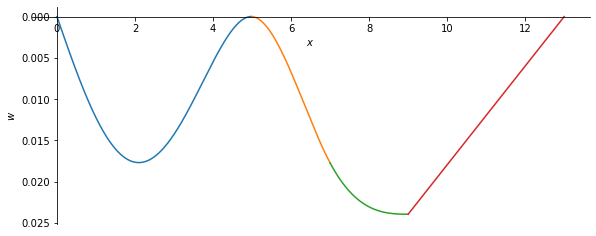

In [3]:
x1_np = np.linspace(0,5,10000)
x2_np = np.linspace(5,7,10000)
x3_np = np.linspace(7,9,10000)
x4_np = np.linspace(9,13,10000)

w1_np = sym.lambdify(x, w1.subs(sol).rewrite(sym.Piecewise))
display(w1.subs(sol))
w2_np = sym.lambdify(x, w2.subs(sol).rewrite(sym.Piecewise))
display(w2.subs(sol))
w3_np = sym.lambdify(x, w3.subs(sol).rewrite(sym.Piecewise))
display(w3.subs(sol))
w4_np = sym.lambdify(x, w4.subs(sol).rewrite(sym.Piecewise))
display(w4.subs(sol))

plt.figure(figsize=(10,4))
plt.plot(x1_np,w1_np(x1_np))
plt.plot(x2_np,w2_np(x2_np))
plt.plot(x3_np,w3_np(x3_np))
plt.plot(x4_np,w4_np(x4_np))
plt.xlabel('$x$')
plt.ylabel('$w$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

6105/409 - 8*x

7775/409

-2450/409

-2450/409

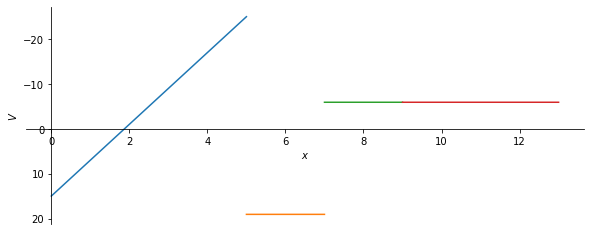

In [9]:
V1 = V1.subs(sol).rewrite(sym.Piecewise)
V2 = V2.subs(sol).rewrite(sym.Piecewise)
V3 = V3.subs(sol).rewrite(sym.Piecewise)
V4 = V4.subs(sol).rewrite(sym.Piecewise)

V1_np = sym.lambdify(x, V1) if V1.free_symbols else float(V1)
V2_np = sym.lambdify(x, V2) if V2.free_symbols else float(V2)
V3_np = sym.lambdify(x, V3) if V3.free_symbols else float(V3)
V4_np = sym.lambdify(x, V4) if V4.free_symbols else float(V4)

display(V1.subs(sol))
display(V2.subs(sol))
display(V3.subs(sol))
display(V4.subs(sol))

plt.figure(figsize=(10,4))
plt.plot(x1_np,V1_np(x1_np)) if callable(V1_np) else plt.plot(x1_np,V1_np*np.ones(len(x1_np)))
plt.plot(x2_np,V2_np(x2_np)) if callable(V2_np) else plt.plot(x2_np,V2_np*np.ones(len(x2_np)))
plt.plot(x3_np,V3_np(x3_np)) if callable(V3_np) else plt.plot(x3_np,V3_np*np.ones(len(x3_np)))
plt.plot(x4_np,V4_np(x4_np)) if callable(V4_np) else plt.plot(x4_np,V4_np*np.ones(len(x4_np)))
plt.xlabel('$x$')
plt.ylabel('$V$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()